In [1]:
import numpy as np
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import Dropout
from keras.layers import LSTM
import sklearn.metrics as sm
import matplotlib.pyplot as plt
import pandas as pd

# **Read File**

In [2]:
data = pd.read_csv('statsi.csv')

In [3]:
data.head(385)

,full_name,birthday,birthday_GMT,league,season,position,Current Club,minutes_played_home,minutes_played_away,nationality,...,min_per_conceded_overall,min_per_match,min_per_card_overall,min_per_assist_overall,cards_per_90_overall,rank_in_club_top_scorer,rank_frac,rank_in_league_top_Strikers,rank_in_league_top_Strikers.1,rank_in_league_top_attackers
0,Stefan Marius Johansen,663292800,08-01-91,Premier League,2018/2019,Striker,Fulham,130,282,Norway,...,37,34,103,0,0.87,24,-1.000000,-1,401,318
1,Kevin McDonald,594604800,04-11-88,Premier League,2018/2019,Striker,Fulham,399,443,Scotland,...,34,56,140,0,0.64,25,-1.727273,-1,410,317
2,Sebastian Prödl,551232000,21-06-87,Premier League,2018/2019,Striker,Watford,0,13,Austria,...,0,13,0,0,0.00,22,1.000000,-1,-1,-1
3,James McCarthy,658368000,12-11-90,Premier League,2018/2019,Striker,Everton,14,0,Republic of Ireland,...,0,14,0,0,0.00,22,1.000000,-1,-1,-1
4,Emerson Hyndman,829008000,09-04-96,Premier League,2018/2019,Striker,AFC Bournemouth,0,37,USA,...,19,37,0,0,0.00,14,0.181818,-1,-1,-1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
380,Leroy Sané,821318400,11-01-96,Premier League,2018/2019,Striker,Manchester City,1024,843,Germany,...,133,60,1867,187,0.05,3,33.692727,-1,4,19
381,Gylfi Sigurdsson,621216000,08-09-89,Premier League,2018/2019,Striker,Everton,1602,1532,Iceland,...,78,82,1045,522,0.09,2,33.226364,-1,86,43
382,Paul Pogba,732153600,15-03-93,Premier League,2018/2019,Striker,Manchester United,1517,1494,France,...,73,86,502,335,0.18,1,34.047273,-1,30,37
383,Luka Milivojević,670982400,07-04-91,Premier League,2018/2019,Striker,Crystal Palace,1710,1710,Serbia,...,73,90,342,1710,0.26,1,39.012727,-1,210,59


In [4]:
data.shape

(385, 49)

In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 385 entries, 0 to 384
Data columns (total 49 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   full_name                      385 non-null    object 
 1   birthday                       385 non-null    int64  
 2   birthday_GMT                   385 non-null    object 
 3   league                         385 non-null    object 
 4   season                         385 non-null    object 
 5   position                       385 non-null    object 
 6   Current Club                   385 non-null    object 
 7   minutes_played_home            385 non-null    int64  
 8   minutes_played_away            385 non-null    int64  
 9   nationality                    385 non-null    object 
 10  appearances_home               385 non-null    int64  
 11  appearances_away               385 non-null    int64  
 12  age                            385 non-null    int

# **'x' is feature variables, 'y' is target variable**

In [6]:
x = data[['minutes_played_overall',
            'appearances_overall',
            'goals_overall',
            'assists_overall',
            'penalty_goals',
            'penalty_misses',
            'conceded_overall',
            'yellow_cards_overall',
            'red_cards_overall',
            'goals_involved_per_90_overall',
            'assists_per_90_overall',
            'goals_per_90_overall',
            'clean_sheets_overall']]
y = data['rank']

# train-test split, 80% training samples & 20% test samples

In [7]:
from sklearn.model_selection import train_test_split

In [8]:
xx, x_test, yy, y_test = train_test_split(x, y, train_size = .8, random_state = 13)

In [9]:
x_train, x_vald, y_train, y_vald = train_test_split(xx, yy, train_size = .8, random_state = 13)

In [10]:
x_train_n = x_train.to_numpy()
x_test_n = x_test.to_numpy()
x_vald_n = x_train.to_numpy()
y_train_n = y_train.to_numpy()
y_test_n = y_test.to_numpy()
y_vald_n = x_test.to_numpy()

* **ensamble means viewing several object as one.**
* **here ensamble methods combine the prediction of several estimators**

In [11]:
from sklearn.ensemble import RandomForestRegressor

## training the system to learn the value of 'y', based on 'x'

In [12]:
model = RandomForestRegressor(n_estimators=30, n_jobs=-1, max_features=5, max_depth=20)
model.fit(x_train, y_train)

RandomForestRegressor(max_depth=20, max_features=5, n_estimators=30, n_jobs=-1)

## predicting target value 'y', based on 'x'

In [13]:
y_predicted = model.predict(x_test)

In [14]:
y_predicted_c = np.round(y_predicted)

In [15]:
r2 = model.score(x_test, y_test)

In [16]:
y_test

51      2
177     8
106     4
197     8
377    28
       ..
369    24
54      2
92      4
353    20
109     5
Name: rank, Length: 77, dtype: int64

In [17]:
y_predicted

array([ 3.56666667,  6.23333333,  5.8       ,  8.26666667, 22.76666667,
        9.1       ,  1.16666667,  1.26666667,  8.03333333,  7.53333333,
        1.46666667,  1.66666667,  1.3       , 10.96666667, 10.26666667,
       10.33333333,  1.33333333,  8.5       ,  5.13333333,  3.1       ,
        6.4       , 10.13333333, 16.53333333,  5.06666667, 11.1       ,
        8.43333333,  1.53333333,  5.5       , 15.36666667,  3.9       ,
       12.86666667, 10.7       ,  6.76666667,  1.73333333, 23.43333333,
        9.8       ,  3.93333333, 12.73333333,  4.06666667,  1.9       ,
        1.46666667,  7.36666667,  4.76666667, 10.63333333, 15.56666667,
       18.8       ,  2.56666667,  3.4       ,  5.23333333, 26.93333333,
        4.03333333,  5.2       ,  4.8       , 23.43333333,  2.86666667,
        8.8       ,  4.86666667, 15.4       ,  8.4       ,  7.73333333,
       26.        ,  7.03333333,  6.76666667,  3.93333333,  7.        ,
        3.96666667, 12.66666667,  8.83333333,  2.26666667,  7.9 

# to find ideal number of estimator, jobs, features and depth
* experimental

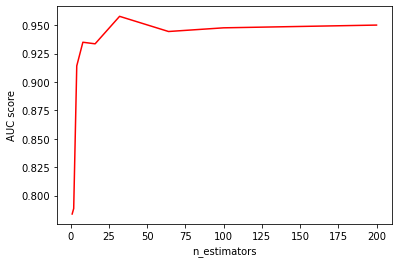

In [18]:
n_estimators = [1,2,4,8,16,32,64,100,200]
train_results = []
test_results = []

for estimator in n_estimators:
   rf = RandomForestRegressor(n_estimators=estimator, n_jobs=-1, max_features=5, max_depth=26)
   rf.fit(x_train, y_train)
   y_pred = rf.predict(x_test)
   roc_auc = rf.score(x_test, y_test)
   test_results.append(roc_auc)


from matplotlib.legend_handler import HandlerLine2D
line2 = plt.plot(n_estimators, test_results, "r", label="Test AUC")
plt.ylabel("AUC score")
plt.xlabel("n_estimators")
plt.show()

Text(0, 0.5, 'Predicted')

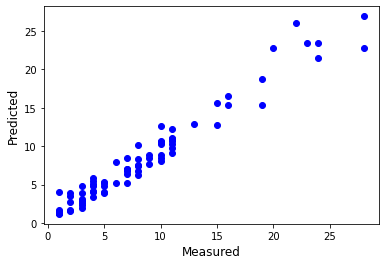

In [19]:
plt.scatter(y_test, y_predicted, color = 'blue')
plt.xlabel('Measured', fontsize=12)
plt.ylabel('Predicted', fontsize=12)

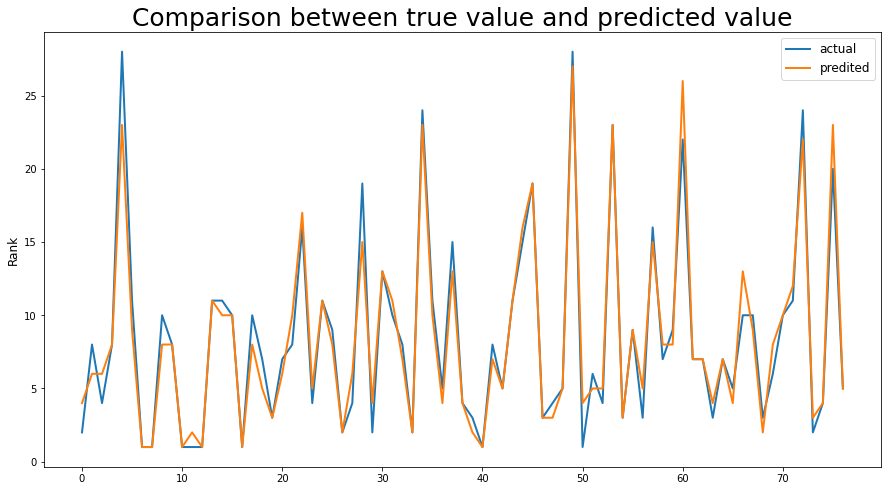

In [20]:
plt.figure(figsize = (15,8))
plt.title('Comparison between true value and predicted value', fontsize=25)
plt.plot(y_test_n, label = "actual", linewidth = 2)
plt.plot(y_predicted_c, label = "predited", linewidth = 2)
plt.ylabel('Rank', fontsize=12)
plt.legend(loc = "best", fontsize=12)

# Area under the (ROC) curve

In [21]:
from sklearn import metrics
fpr, tpr, thresholds = metrics.roc_curve(y_test, y_predicted, pos_label=13)
roc_auc = metrics.auc(fpr, tpr)

In [22]:
roc_auc

0.8421052631578948

Text(0, 0.5, 'True Positive Rate')

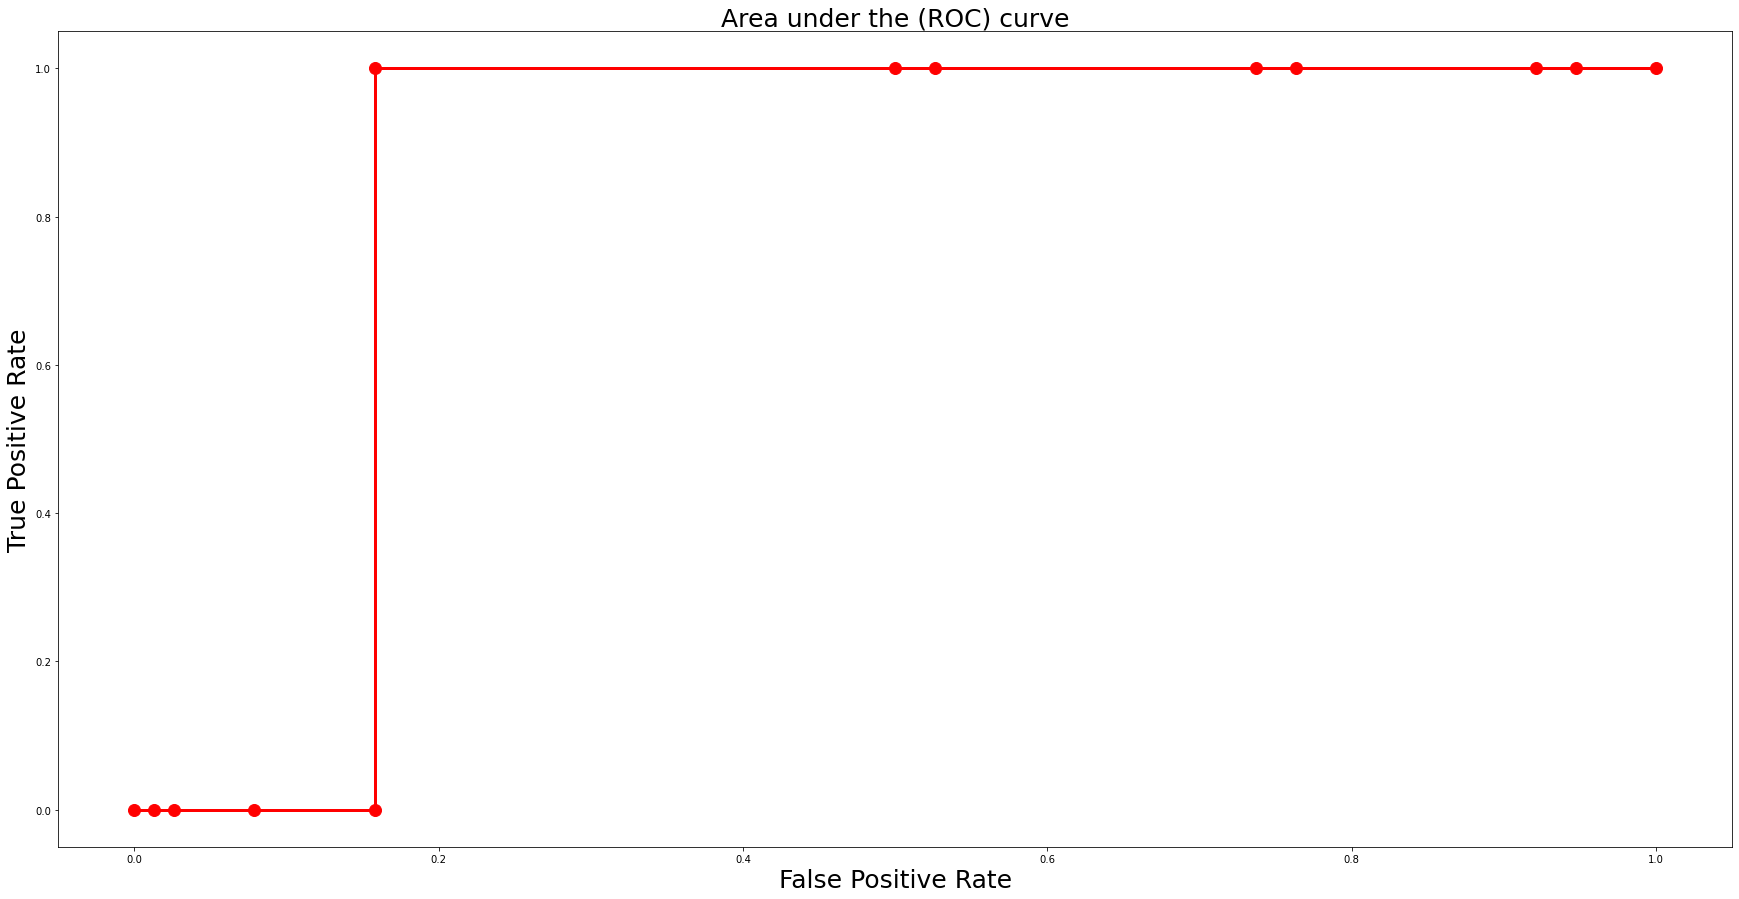

In [23]:
plt.figure(figsize = (30,15))
plt.title('Area under the (ROC) curve', fontsize=25)
plt.plot(fpr, tpr, linewidth = 3, marker = '.', markersize=24, color = 'red')
plt.xlabel('False Positive Rate', fontsize=25)
plt.ylabel('True Positive Rate', fontsize=25)

# Neural Network

In [24]:
from keras.models import Sequential, load_model
from keras.layers import Conv2D, MaxPool2D, Dense, Flatten, Dropout

In [25]:
modl = Sequential()
modl.add(Dense(32, input_dim = 13, activation = 'relu'))
modl.add(Dense(16))
modl.add(Dense(8))
modl.add(Dense(4))
modl.add(Dense(2))
modl.add(Dense(1))

In [26]:
modl.compile(optimizer='adam',
              loss='mse',
              metrics=[['accuracy', 'mse', 'mae']])

modl.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 32)                448       
_________________________________________________________________
dense_1 (Dense)              (None, 16)                528       
_________________________________________________________________
dense_2 (Dense)              (None, 8)                 136       
_________________________________________________________________
dense_3 (Dense)              (None, 4)                 36        
_________________________________________________________________
dense_4 (Dense)              (None, 2)                 10        
_________________________________________________________________
dense_5 (Dense)              (None, 1)                 3         
Total params: 1,161
Trainable params: 1,161
Non-trainable params: 0
______________________________________________________

# Fiting for Training data

In [27]:
history = modl.fit(
    x_train, 
    y_train, 
    batch_size=32, 
    epochs=100, verbose=2, 
    callbacks=None,
    validation_data=(x_vald, y_vald))

Epoch 1/100
8/8 - 0s - loss: 51383.9180 - accuracy: 0.0488 - mse: 51383.9180 - mae: 160.6920 - val_loss: 16026.7041 - val_accuracy: 0.0000e+00 - val_mse: 16026.7041 - val_mae: 102.7363
Epoch 2/100
8/8 - 0s - loss: 25747.2129 - accuracy: 0.0000e+00 - mse: 25747.2129 - mae: 136.1882 - val_loss: 6788.3296 - val_accuracy: 0.0000e+00 - val_mse: 6788.3296 - val_mae: 67.0571
Epoch 3/100
8/8 - 0s - loss: 3343.4451 - accuracy: 0.0366 - mse: 3343.4451 - mae: 43.6936 - val_loss: 8771.1289 - val_accuracy: 0.1129 - val_mse: 8771.1289 - val_mae: 73.6179
Epoch 4/100
8/8 - 0s - loss: 5444.5225 - accuracy: 0.0610 - mse: 5444.5225 - mae: 59.5728 - val_loss: 380.3719 - val_accuracy: 0.0968 - val_mse: 380.3719 - val_mae: 14.7201
Epoch 5/100
8/8 - 0s - loss: 1112.3350 - accuracy: 0.0163 - mse: 1112.3350 - mae: 24.3871 - val_loss: 1547.3229 - val_accuracy: 0.0161 - val_mse: 1547.3229 - val_mae: 31.9850
Epoch 6/100
8/8 - 0s - loss: 889.1219 - accuracy: 0.0285 - mse: 889.1219 - mae: 21.1034 - val_loss: 442.32

Epoch 50/100
8/8 - 0s - loss: 96.6826 - accuracy: 0.0407 - mse: 96.6826 - mae: 7.0964 - val_loss: 75.2842 - val_accuracy: 0.0806 - val_mse: 75.2842 - val_mae: 6.4334
Epoch 51/100
8/8 - 0s - loss: 96.8240 - accuracy: 0.0407 - mse: 96.8240 - mae: 6.9910 - val_loss: 83.1271 - val_accuracy: 0.0968 - val_mse: 83.1271 - val_mae: 6.7927
Epoch 52/100
8/8 - 0s - loss: 97.1677 - accuracy: 0.0488 - mse: 97.1677 - mae: 7.2195 - val_loss: 70.3609 - val_accuracy: 0.0806 - val_mse: 70.3609 - val_mae: 6.2007
Epoch 53/100
8/8 - 0s - loss: 94.3456 - accuracy: 0.0447 - mse: 94.3456 - mae: 7.0366 - val_loss: 68.4495 - val_accuracy: 0.0806 - val_mse: 68.4495 - val_mae: 6.1053
Epoch 54/100
8/8 - 0s - loss: 95.1661 - accuracy: 0.0407 - mse: 95.1661 - mae: 7.0413 - val_loss: 64.8382 - val_accuracy: 0.0806 - val_mse: 64.8382 - val_mae: 5.8961
Epoch 55/100
8/8 - 0s - loss: 93.0502 - accuracy: 0.0447 - mse: 93.0502 - mae: 6.9102 - val_loss: 81.1694 - val_accuracy: 0.0968 - val_mse: 81.1694 - val_mae: 6.7199
Epoc

Epoch 100/100
8/8 - 0s - loss: 54.6297 - accuracy: 0.0447 - mse: 54.6297 - mae: 5.3476 - val_loss: 34.7049 - val_accuracy: 0.0806 - val_mse: 34.7049 - val_mae: 4.3510


In [28]:
train_loss = history.history['loss']
train_val_loss = history.history['val_loss']
train_accu = history.history['accuracy']
train_val_accu = history.history['val_accuracy']
train_mse = history.history['mse']
train_val_mse = history.history['val_mse']
train_mae = history.history['mae']
train_val_mae = history.history['val_mae']
train_los, train_acc, _, __ = modl.evaluate(x_train, y_train, verbose=2)

8/8 - 0s - loss: 48.3374 - accuracy: 0.0407 - mse: 48.3374 - mae: 4.9772


# Fitting for Testing data

In [29]:
modl.compile(optimizer='adam',
              loss='mse',
              metrics=[['accuracy', 'mse', 'mae']])

modl.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 32)                448       
_________________________________________________________________
dense_1 (Dense)              (None, 16)                528       
_________________________________________________________________
dense_2 (Dense)              (None, 8)                 136       
_________________________________________________________________
dense_3 (Dense)              (None, 4)                 36        
_________________________________________________________________
dense_4 (Dense)              (None, 2)                 10        
_________________________________________________________________
dense_5 (Dense)              (None, 1)                 3         
Total params: 1,161
Trainable params: 1,161
Non-trainable params: 0
______________________________________________________

In [30]:
history = modl.fit(
    x_train, 
    y_train, 
    batch_size=32, 
    epochs=100, verbose=2, 
    callbacks=None,
    validation_data=(x_test, y_test))

Epoch 1/100
8/8 - 0s - loss: 1703.5079 - accuracy: 0.0285 - mse: 1703.5079 - mae: 29.5564 - val_loss: 561.9677 - val_accuracy: 0.0130 - val_mse: 561.9677 - val_mae: 19.1031
Epoch 2/100
8/8 - 0s - loss: 867.6212 - accuracy: 0.0325 - mse: 867.6212 - mae: 22.9432 - val_loss: 708.5697 - val_accuracy: 0.0909 - val_mse: 708.5697 - val_mae: 21.0778
Epoch 3/100
8/8 - 0s - loss: 318.6674 - accuracy: 0.0407 - mse: 318.6674 - mae: 13.4445 - val_loss: 157.1060 - val_accuracy: 0.0390 - val_mse: 157.1060 - val_mae: 9.1428
Epoch 4/100
8/8 - 0s - loss: 143.9530 - accuracy: 0.0488 - mse: 143.9530 - mae: 9.0903 - val_loss: 50.0855 - val_accuracy: 0.0519 - val_mse: 50.0855 - val_mae: 4.3089
Epoch 5/100
8/8 - 0s - loss: 105.2692 - accuracy: 0.0366 - mse: 105.2692 - mae: 7.5008 - val_loss: 138.7443 - val_accuracy: 0.0649 - val_mse: 138.7443 - val_mae: 9.1669
Epoch 6/100
8/8 - 0s - loss: 105.1102 - accuracy: 0.0366 - mse: 105.1102 - mae: 7.6046 - val_loss: 47.7463 - val_accuracy: 0.0519 - val_mse: 47.7463 -

Epoch 50/100
8/8 - 0s - loss: 15.4104 - accuracy: 0.0528 - mse: 15.4104 - mae: 2.8264 - val_loss: 22.7416 - val_accuracy: 0.0519 - val_mse: 22.7416 - val_mae: 3.3254
Epoch 51/100
8/8 - 0s - loss: 19.0833 - accuracy: 0.0447 - mse: 19.0833 - mae: 3.1645 - val_loss: 10.7627 - val_accuracy: 0.0649 - val_mse: 10.7627 - val_mae: 2.0395
Epoch 52/100
8/8 - 0s - loss: 15.1171 - accuracy: 0.0528 - mse: 15.1171 - mae: 2.8058 - val_loss: 14.6062 - val_accuracy: 0.0909 - val_mse: 14.6062 - val_mae: 2.9993
Epoch 53/100
8/8 - 0s - loss: 11.1822 - accuracy: 0.0569 - mse: 11.1822 - mae: 2.3914 - val_loss: 9.9182 - val_accuracy: 0.0649 - val_mse: 9.9182 - val_mae: 1.9654
Epoch 54/100
8/8 - 0s - loss: 8.3374 - accuracy: 0.0569 - mse: 8.3374 - mae: 2.1103 - val_loss: 8.4307 - val_accuracy: 0.0779 - val_mse: 8.4307 - val_mae: 1.9672
Epoch 55/100
8/8 - 0s - loss: 8.7780 - accuracy: 0.0569 - mse: 8.7780 - mae: 2.1579 - val_loss: 9.3037 - val_accuracy: 0.0909 - val_mse: 9.3037 - val_mae: 2.2715
Epoch 56/100
8

In [31]:
test_loss = history.history['loss']
test_val_loss = history.history['val_loss']
test_accu = history.history['accuracy']
test_val_accu = history.history['val_accuracy']
test_mse = history.history['mse']
test_val_mse = history.history['val_mse']
test_mae = history.history['mae']
test_val_mae = history.history['val_mae']
test_los, test_acc, _, __ = modl.evaluate(x_test, y_test, verbose=2)

3/3 - 0s - loss: 3.4810 - accuracy: 0.1039 - mse: 3.4810 - mae: 1.3921


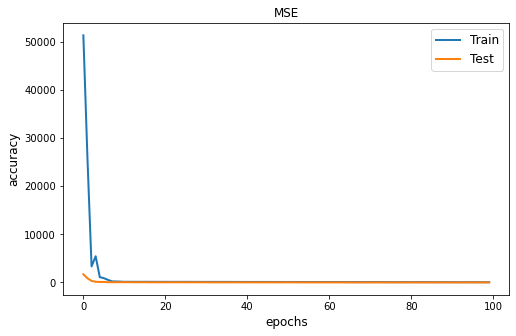

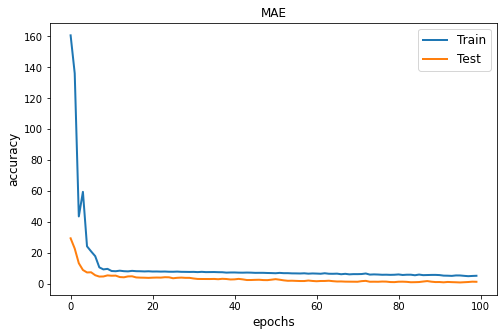

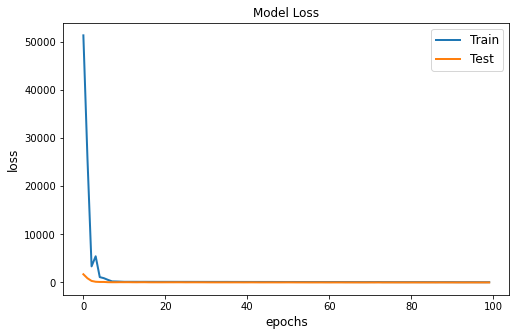

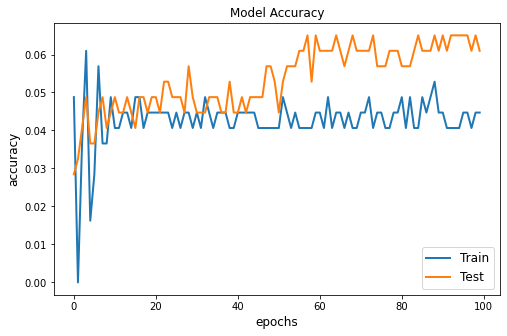

In [32]:
plt.figure(figsize = (8,5))
plt.plot(train_mse, label='Train', linewidth = 2)
plt.plot(test_mse, label='Test', linewidth = 2)
plt.title('MSE', fontsize=12)
plt.xlabel('epochs', fontsize=12)
plt.ylabel('accuracy', fontsize=12)
plt.legend(loc = "best", fontsize=12)
plt.show()

plt.figure(figsize = (8,5))
plt.plot(train_mae, label='Train', linewidth = 2)
plt.plot(test_mae, label='Test', linewidth = 2)
plt.title('MAE', fontsize=12)
plt.xlabel('epochs', fontsize=12)
plt.ylabel('accuracy', fontsize=12)
plt.legend(loc = "best", fontsize=12)
plt.show()

plt.figure(figsize = (8,5))
plt.plot(train_loss, label='Train', linewidth = 2)
plt.plot(test_loss, label='Test', linewidth = 2)
plt.title('Model Loss', fontsize=12)
plt.xlabel('epochs', fontsize=12)
plt.ylabel('loss', fontsize=12)
plt.legend(loc = "best", fontsize=12)
plt.show()

plt.figure(figsize = (8,5))
plt.plot(train_accu, label='Train', linewidth = 2)
plt.plot(test_accu, label='Test', linewidth = 2)
plt.title('Model Accuracy', fontsize=12)
plt.xlabel('epochs', fontsize=12)
plt.ylabel('accuracy', fontsize=12)
plt.legend(loc = "best", fontsize=12)
plt.show()

# Error calculations

In [33]:
me = sm.max_error(y_test, y_predicted)
mae = sm.mean_absolute_error(y_test, y_predicted)
mse = sm.mean_squared_error(y_test, y_predicted)
mape = sm.mean_absolute_percentage_error(y_test, y_predicted)
rmse = mse ** 0.5

In [34]:
print('Maximum Error: ', me)
print('Mean absolute error =', mae)
print('Mean absolute percentage error =', mape)
print('Mean squared error =', mse)
print('Root Mean squared error =', rmse)
print('R2 score =', r2)
print('ROC curvce accuracy =', roc_auc)
print('Training loss =', train_los)
print('Training accuracy =', train_acc)
print('Teting loss =', test_los)
print('Testing accuracy =', test_acc)

Maximum Error:  5.233333333333334
Mean absolute error = 1.0268398268398269
Mean absolute percentage error = 0.21584587376899184
Mean squared error = 2.0331313131313133
Root Mean squared error = 1.4258791369296744
R2 score = 0.9535040941627431
ROC curvce accuracy = 0.8421052631578948
Training loss = 48.337379455566406
Training accuracy = 0.04065040498971939
Teting loss = 3.481027603149414
Testing accuracy = 0.10389610379934311


In [35]:
data = {'Values':  [me, mae, mape, mse, rmse, r2, roc_auc, train_los, train_acc, test_los, test_acc]}
table = pd.DataFrame (data, columns = ['Values'])
table.index = ['ME', 'MAE', 'MAPE', 'MSE', 'RMSE', 'R2', 'ROC ACCURACY', 'TRAIN LOSS', "TEST LOSS", 'TRAIN ACCURACY', 'TEST ACCURACY']

In [36]:
table

,Values
ME,5.233333
MAE,1.026840
MAPE,0.215846
MSE,2.033131
RMSE,1.425879
R2,0.953504
ROC ACCURACY,0.842105
TRAIN LOSS,48.337379
TEST LOSS,0.040650
TRAIN ACCURACY,3.481028


In [37]:
y_predicted_test = model.predict([[3054,36,9,4,0,0,43,3,0,0.38,0.12,0.27,6]])

In [38]:
y_predicted_test

array([20.3])